# 2.1 웹에서 데이터 가져오기 (request, BeatifulSoup, google_image_download 활용)<br>

Chapter 1 에서 파이썬으로 파일과 디렉토리를 관리하는 방법에 대해 알아보았다. <br>
그런데 실제로 이것을 써먹으려면 일단 관리할 파일이 좀 있어야 할 것 같다. <br>
빈 파일을 마구 만드는 것 자체는 어렵지 않지만, 데이터가 들어 있어야 의미가 있지 않을까? <br>
이번 장에서는 웹에서 데이터를 스크래핑하여 파일을 생성하는 법에 대해 알아보자. 

### requests <br>

일단, 파이썬 내장모듈인 requests 를 이용하면 <br>
한 줄의 코드만으로 원하는 url에 대한 html을 긁어올 수는 있다. <br>
다음을 참조하자.

In [1]:
import requests
requests.get("https://namu.wiki/w/종이접기").text

'<!doctype html>\n<html data-n-head-ssr><head ><title>종이접기 - 나무위키</title><meta data-n-head="ssr" charset="utf-8"><meta data-n-head="ssr" name="viewport" content="user-scalable=no, initial-scale=1.0, maximum-scale=5.0, minimum-scale=1.0, width=device-width"><meta data-n-head="ssr" http-equv="x-ua-compatible" content="ie=edge"><meta data-n-head="ssr" name="generator" content="the seed"><meta data-n-head="ssr" name="mobile-web-app-capable" content="yes"><meta data-n-head="ssr" name="application-name" content="나무위키"><meta data-n-head="ssr" name="msapplication-tooltip" content="나무위키"><meta data-n-head="ssr" name="msapplication-starturl" content="/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EB%8C%80%EB%AC%B8"><meta data-n-head="ssr" name="theme-color" content="#008275"><meta data-n-head="ssr" name="googlebot" content="noarchive"><link data-n-head="ssr" rel="canonical" href="https://namu.wiki/w/%EC%A2%85%EC%9D%B4%EC%A0%91%EA%B8%B0"><link data-n-head="ssr" rel="search" type="application/opensearch

### BeautifulSoup<br>

html을 그대로 가져오긴 했는데 사람이 이해하기에는 다소(?) 불편하다. <br>
따라서 원하는 정보(예: 본문 텍스트)만을 취사선택할 필요가 있다. <br>
그런데 이러한 html 코드는 사이트마다 제각각이기 때문에, <br>
일일이 분석하여 원하는 정보를 추출하는 작업은 대단히 번거로운 작업이다.<br>
(더구나 이러한 html 코드들은 수시로 변한다.) <br>

이러한 번거로움을 조금이나마 덜기 위해, BeatifulSoup 이라는 모듈이 널리 쓰인다. <br>

In [2]:
from bs4 import BeautifulSoup

이것을 이용하여 나무위키 문서를 받아오는 코드를 짜 보자. <br>
나무위키는 비교적 크롤링이 수월한 편이다.

In [3]:
def get_namuwiki(doc_title):
    url = "https://namu.wiki/w/" + doc_title
    resp = requests.get(url)
    if resp.status_code == 200:
        html_source = resp.text
    else:
        return "페이지가 존재하지 않습니다."
    soup = BeautifulSoup(html_source)
    # 아래 부분은 직접 html 코드를 들여다 보고 찾아내는 수 밖에 없다.
    for div in soup('div'):
        if 'class' in div.attrs and div['class'][0] is 'w':
            return div.get_text()

get_namuwiki("종이접기")

"카미야 사토시(神谷哲史)의 '류진(龍神)3.5'.[1]1. 개요2. 역사3. 법칙4. 작가5. 기타6. 대중매체7. 동요7.1. 강소천 작사, 정세문 작곡7.2. 유경숙 작사, 김봉학 작곡7.2.1. 트리비아8. 관련 문서1. 개요[편집]종이나 색종이를 접어 원하는 모양대로 만드는 기예. 종이공예와는 비슷하면서 좀 다르다. 서구권에는 Paper folding, 독일에서는 Papierfalten 라고 부르는데, 미국종이접기협회 창립자인 릴리언 오펜하이머가 Origami를 제안해 공식용어화 되었다. 일본어로는 오리가미(折り紙)[2]라고 부르며  [3][4] 쓰나미처럼 일본어가 세계 표준으로 정착된 용어다.2. 역사[편집]중국에서는 송나라 때 전통 장례식의 관행으로 장례식 제물들을 종이로 만들어서 놓은 풍습이 있었다고 한다. 초기에는 주술의 용도로 쓰였던 것으로 알려져 있다. 일본에서는 헤이안 시대 때 일본의 문신(文臣)이자 시인이었던 후지와라노 기요스케가 쓴 청보조신집(清輔朝臣集)에 종이개구리 접기에 대한 설명이 있고 유럽에서는 13세기의 천문학자 요하네스 데 사크로보스코(Johannes de Sacrobosco)의 저서 천구론(De Sphaera Mundi)《1490년》에 종이로 접은 듯한 작은 돛단배 삽화가 등장한다.일본의 종이접기는 시간이 지나면서 혼례나 선물 등으로 쓰임새가 넓어지게 되었다. 유럽의 경우 냅킨접기가 유행했고, 기사나 말의 종이접기 작품도 제작되었다. 그 후 유아교육자의 아버지로 불리는 독일의 교육자 프리드리히 프뢰벨은 아이들을 교육시키기 위해 종이접기를 생각했는데, 대표적인 종이접기는 현재에도 널리 알려진 비행기, 돛단배, 다트, 기하학 도형의 종이접기다. 메이지 유신 이후 일본의 종이접기에 통합되었다. 일본에 프뢰벨식 종이접기가 교육에 도입되었는데, 일본에서 'Papierfalten' 단어를 오리가미로 번역했서 초등학교에 사용했다고 한다. 처음에는 사용되지 않았지만 나중에 널리 쓰이게 되었다고 한다. 오리가미 역사(일본어)3. 법칙[편집

나무위키는 한글로 되어 있는데, 영문으로 된 위키피디아도 비슷하게 따올 수 있다. 

In [4]:
def get_wiki(doc_title):
    url = "https://en.wikipedia.org/wiki/" + doc_title
    resp = requests.get(url)
    if resp.status_code == 200:
        html_source = resp.text
    else:
        return "페이지가 존재하지 않습니다."
    soup = BeautifulSoup(html_source)
    # 이 부분이 나무위키와 달라진 것을 알 수 있다. 이처럼 사이트가 바뀔 때 마다 html 구조를 분석해서 찾아줘야 한다.
    for div in soup('div'):
        if 'class' in div.attrs and div['class'][0] in ['mw-body']:
            return div.get_text()

get_wiki("origami")

'\n\n\n\n\n\nOrigami\n\nFrom Wikipedia, the free encyclopedia\n\n\nJump to navigation\nJump to search\n"Paper folding" redirects here. For other uses of the term, see Paper folding (disambiguation). For other uses of Origami, see Origami (disambiguation).\n\n\nTraditional Japanese art of paper folding\n\n\n Origami cranes\nPlay media The folding of an Origami crane\nOrigami (折り紙, Japanese pronunciation:\xa0[oɾiɡami] or [oɾiꜜɡami], from ori meaning "folding", and kami meaning "paper" (kami changes to gami due to rendaku)) is the art of paper folding, which is often associated with Japanese culture. In modern usage, the word "origami" is used as an inclusive term for all folding practices, regardless of their culture of origin. The goal is to transform a flat square sheet of paper into a finished sculpture through folding and sculpting techniques. Modern origami practitioners generally discourage the use of cuts, glue, or markings on the paper. Origami folders often use the Japanese word

이걸로 파일을 마구 생성해 보자.

In [5]:
import os
if os.path.exists("./data_2_1") is False:
    os.mkdir("./data_2_1")
    
for keyword in ['monkey','apple','banana','train','airplane','mountain']:
    f = open("./data_2_1/"+keyword+".txt",mode="wt",encoding="UTF-8")
    f.write(get_wiki(keyword))
    f.close()
os.listdir("./data_2_1")

['airplane.txt',
 'apple.txt',
 'banana.txt',
 'monkey.txt',
 'mountain.txt',
 'train.txt']

### google_images_download

텍스트 말고, 이미지 데이터가 필요하다면? <br>
고맙게도, google 이미지검색 후 원본 데이터를 다운로드받아 주는 모듈을 이미 누군가 짜 놓았다. <br>
pip 를 통해 다운로드 가능하다.

In [6]:
from google_images_download import google_images_download
def get_google_images(keyword, limit=10, output_path="./images_google"):
    response = google_images_download.googleimagesdownload()
    arguments = {"keywords":keyword,
                "limit":limit,
                "print_urls":True,
                "no_directory":True,
                "output_directory":output_path}
    paths = response.download(arguments)
    return paths

keyword = "종이접기"
paths = get_google_images(keyword,7,"./data_2_1")


Item no.: 1 --> Item name = \uc885\uc774\uc811\uae30
Evaluating...
Starting Download...
Image URL: https://i.ytimg.com/vi/u1SDTwhAfw4/maxresdefault.jpg
Completed Image ====> 1.maxresdefault.jpg
Image URL: https://i.ytimg.com/vi/32wr9PtBHFo/maxresdefault.jpg
Completed Image ====> 2.maxresdefault.jpg
Image URL: https://i.pinimg.com/564x/4a/af/ec/4aafece81a69912af40a6a9d4c469e10.jpg
Completed Image ====> 3.4aafece81a69912af40a6a9d4c469e10.jpg
Image URL: https://i.pinimg.com/564x/52/c9/2d/52c92de91ce096d81094bd541b3789b2.jpg
Completed Image ====> 4.52c92de91ce096d81094bd541b3789b2.jpg
Image URL: https://i.ytimg.com/vi/SEIEo0tYEmA/maxresdefault.jpg
Completed Image ====> 5.maxresdefault.jpg
Image URL: https://previews.123rf.com/images/andegro4ka/andegro4ka1602/andegro4ka160200192/51987859-%EC%A2%85%EC%9D%B4-%EC%A0%91%EA%B8%B0-%EC%95%84%EC%9D%B4%EC%BD%98-%EC%83%81%EC%84%B8%ED%95%9C-%EC%82%AC%EC%A7%84-%ED%98%84%EC%8B%A4%EC%A0%81%EC%9D%B8-%EB%B2%A1%ED%84%B0-%EC%84%A4%EC%A0%95.jpg
Completed Ima

### cv2.imread , cv2.split, cv2.merge

다운받은 이미지 파일을 배열로 불러오는 모듈은 PIL, OpenCV, scikit-image 등 여러 종류가 있는데, <br>
최근에는 OpenCV가 가장 인기있는 듯 하다. <br>
특기할만한 사항은 cv2.imread(img_path) 를 통해 불러온 배열은 b,g,r 순으로 되어있으므로 <br>
출력하기 전에 순서를 재배치해 주어야 한다. (안 그러면 색이 이상하게 나온다.) <br>

0 7


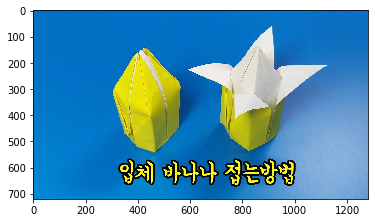

1 7


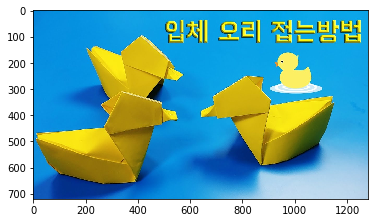

2 7


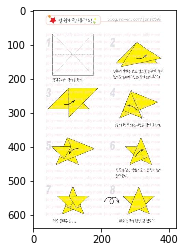

3 7


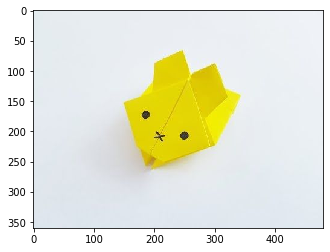

4 7


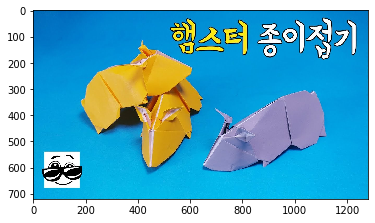

5 7


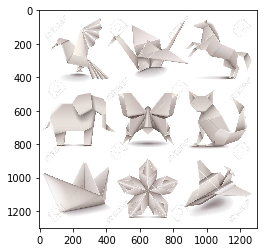

6 7


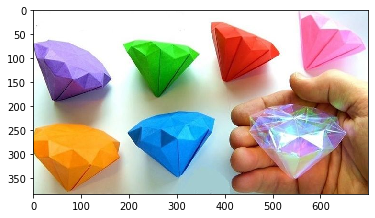

In [7]:
import cv2
import matplotlib.pyplot as plt
searched = paths[0][keyword]
images_cv = []
for img in searched:
    print(len(images_cv),len(searched))
    img_bgr = cv2.imread(img[46:])
    b, g, r = cv2.split(img_bgr)
    img_rgb = cv2.merge([r,g,b])
    images_cv.append(img_rgb)
    plt.imshow(img_rgb)
    plt.pause(0.001)